<a href="https://colab.research.google.com/github/Caps-Loo/ML-StudentScores/blob/main/ML_StudentScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# Import Library


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# Import Dataset

In [36]:
# Import dan load dataset
df = pd.read_csv('student_scores.csv')

# Exploratory Data Analysis and Feature Engineering

Pengecekan Duplikat:
Jumlah baris duplikat: 0

Pengecekan Missing Values:
Hours     0
Scores    0
dtype: int64

Analisis Outliers:
Outliers dalam Jam Belajar:
Empty DataFrame
Columns: [Hours, Scores]
Index: []

Outliers dalam Skor:
Empty DataFrame
Columns: [Hours, Scores]
Index: []


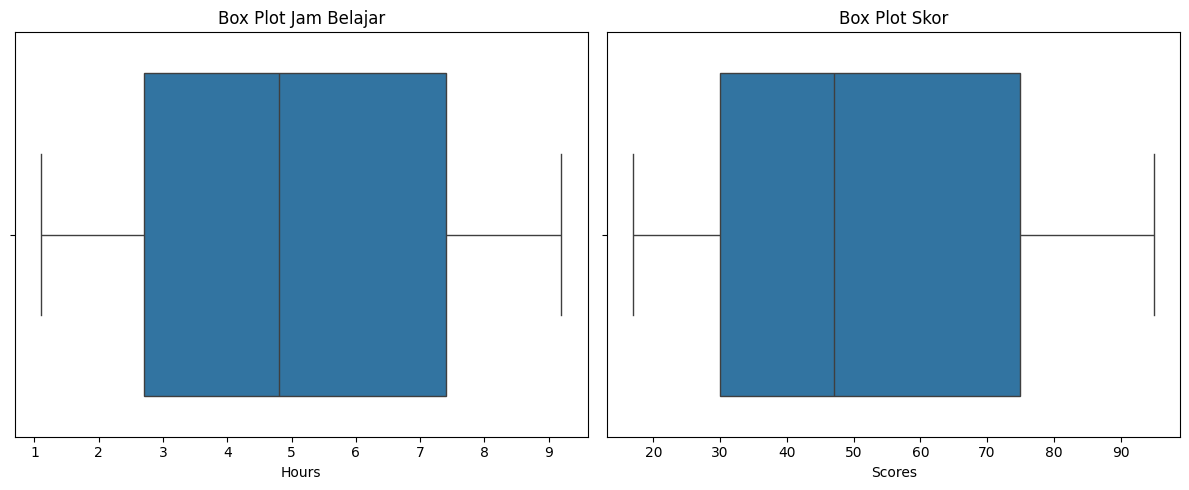

In [41]:
# EDA dan Feature Engineering
def perform_eda_and_feature_engineering(df):
    # Cek Duplikat
    print("Pengecekan Duplikat:")
    duplikasi = df.duplicated()
    print("Jumlah baris duplikat:", duplikasi.sum())

    if duplikasi.sum() > 0:
        print("\nBaris-baris yang duplikat:")
        print(df[duplikasi])
        # Hapus duplikat jika ada
        df = df.drop_duplicates()

    # Cek Missing Values
    print("\nPengecekan Missing Values:")
    missing_values = df.isnull().sum()
    print(missing_values)

    # Outlier Analysis
    print("\nAnalisis Outliers:")
    # Metode IQR untuk deteksi outliers
    Q1_hours = df['Hours'].quantile(0.25)
    Q3_hours = df['Hours'].quantile(0.75)
    IQR_hours = Q3_hours - Q1_hours

    Q1_scores = df['Scores'].quantile(0.25)
    Q3_scores = df['Scores'].quantile(0.75)
    IQR_scores = Q3_scores - Q1_scores

    # Definisi outliers
    outliers_hours = df[
        (df['Hours'] < (Q1_hours - 1.5 * IQR_hours)) |
        (df['Hours'] > (Q3_hours + 1.5 * IQR_hours))
    ]

    outliers_scores = df[
        (df['Scores'] < (Q1_scores - 1.5 * IQR_scores)) |
        (df['Scores'] > (Q3_scores + 1.5 * IQR_scores))
    ]

    print("Outliers dalam Jam Belajar:")
    print(outliers_hours)
    print("\nOutliers dalam Skor:")
    print(outliers_scores)

    # Visualisasi Outliers
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df['Hours'])
    plt.title('Box Plot Jam Belajar')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df['Scores'])
    plt.title('Box Plot Skor')
    plt.tight_layout()
    plt.show()

    return df

# Lakukan EDA dan Feature Engineering
df_cleaned = perform_eda_and_feature_engineering(df)

# Preparation Data, Split Data and Feature Scaling

In [42]:
# Persiapan Data untuk Modeling
def prepare_data(df):
    # Pemisahan fitur dan target
    X = df['Hours'].values.reshape(-1, 1)
    y = df['Scores'].values

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(wh
        X, y,
        test_size=0.2,     # 20% data untuk testing
        random_state=42    # Untuk reprodusibilitas
    )

    # Scaling fitur
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train The Model

In [45]:
# Proses Modeling
def model_training_and_evaluation(X_train, X_test, y_train, y_test):
    # Daftar model yang akan diuji
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    # Dictionary untuk menyimpan hasil evaluasi
    model_performance = {}

    # Training dan evaluasi setiap model
    for name, model in models.items():
        # Training model
        model.fit(X_train, y_train)

        # Prediksi
        y_pred = model.predict(X_test)

        # Evaluasi model
        model_performance[name] = evaluate_model(y_test, y_pred, name)

    return models, model_performance

# Model Evaluation

In [46]:
# Evaluasi Model
def evaluate_model(y_true, y_pred, model_name):
    """
    Menghitung metrik evaluasi untuk model regresi
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluasi Model {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Visualization and Model Comparison

In [49]:
# Visualisasi Perbandingan Model
def plot_model_comparison(models, X_test, y_test):
    plt.figure(figsize=(15, 5))

    model_names = list(models.keys())
    for i, (name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, i)
        y_pred = model.predict(X_test)

        plt.scatter(X_test, y_test, color='red', label='Data Aktual')
        plt.plot(X_test, y_pred, color='blue', linestyle='dashed', label=f'Prediksi {name}')
        plt.title(f'Prediksi {name}')
        plt.xlabel('Jam Belajar (Scaled)')
        plt.ylabel('Skor')
        plt.legend()

    plt.tight_layout()
    plt.show()


Evaluasi Model Linear Regression:
Mean Squared Error: 18.9432
Mean Absolute Error: 3.9208
R-squared: 0.9678

Evaluasi Model Decision Tree:
Mean Squared Error: 31.7000
Mean Absolute Error: 5.4000
R-squared: 0.9461

Evaluasi Model Random Forest:
Mean Squared Error: 18.6880
Mean Absolute Error: 3.4020
R-squared: 0.9682


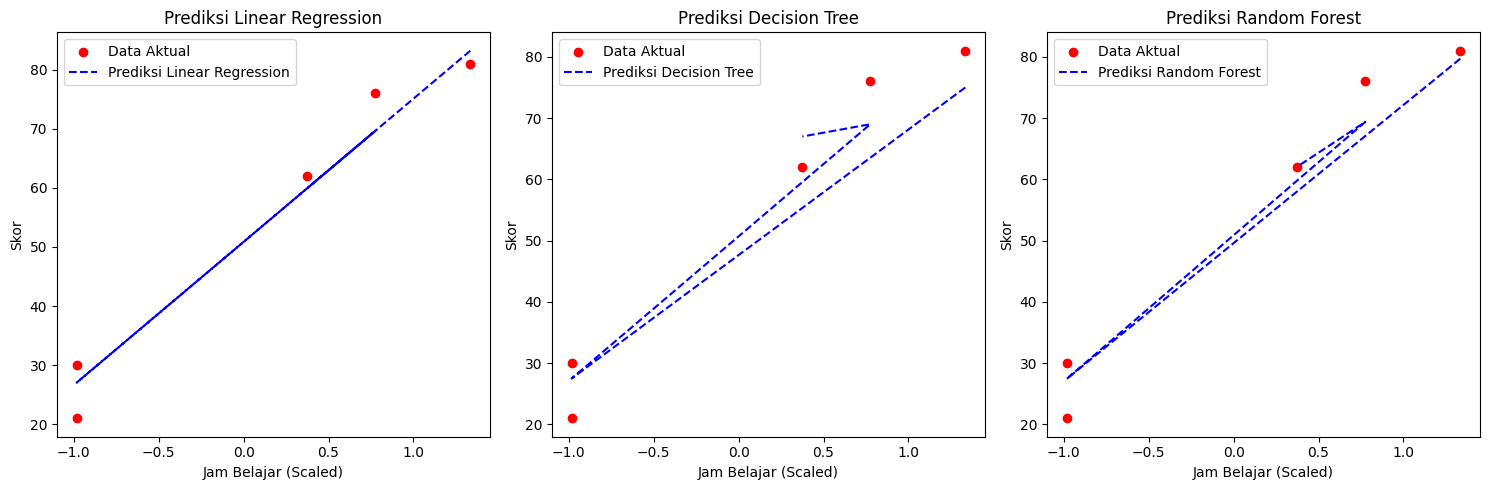

In [50]:
# Persiapan data
X_train, X_test, y_train, y_test, scaler = prepare_data(df_cleaned)

# Training dan evaluasi model
trained_models, performance = model_training_and_evaluation(X_train, X_test, y_train, y_test)

# Visualisasi perbandingan model
plot_model_comparison(trained_models, X_test, y_test)

# Conclusion

In [52]:
# Kesimpulan Model Terbaik
print("\nKesimpulan Model Terbaik:")
best_model = min(performance, key=lambda x: performance[x]['MSE'])
print(f"Model terbaik berdasarkan Mean Squared Error: {best_model}")
print("Detail Performa:")
for model, metrics in performance.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Kesimpulan Model Terbaik:
Model terbaik berdasarkan Mean Squared Error: Random Forest
Detail Performa:
Linear Regression:
  MSE: 18.9432
  MAE: 3.9208
  R2: 0.9678
Decision Tree:
  MSE: 31.7000
  MAE: 5.4000
  R2: 0.9461
Random Forest:
  MSE: 18.6880
  MAE: 3.4020
  R2: 0.9682
